In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt 
import torch.nn as nn
import torch.nn.functional as F
torch.set_printoptions(linewidth=120)
import torch.optim as optim

In [0]:
print(torchvision.__version__)
print(torch.__version__)

0.5.0
1.4.0


In [0]:
train_set=torchvision.datasets.FashionMNIST(
    root='/content/drive/My Drive/.data',
    train=True,
    transform=transforms.Compose([transforms.ToTensor()]),
    download=True
)

loaded_data=torch.utils.data.DataLoader(train_set,batch_size=100)

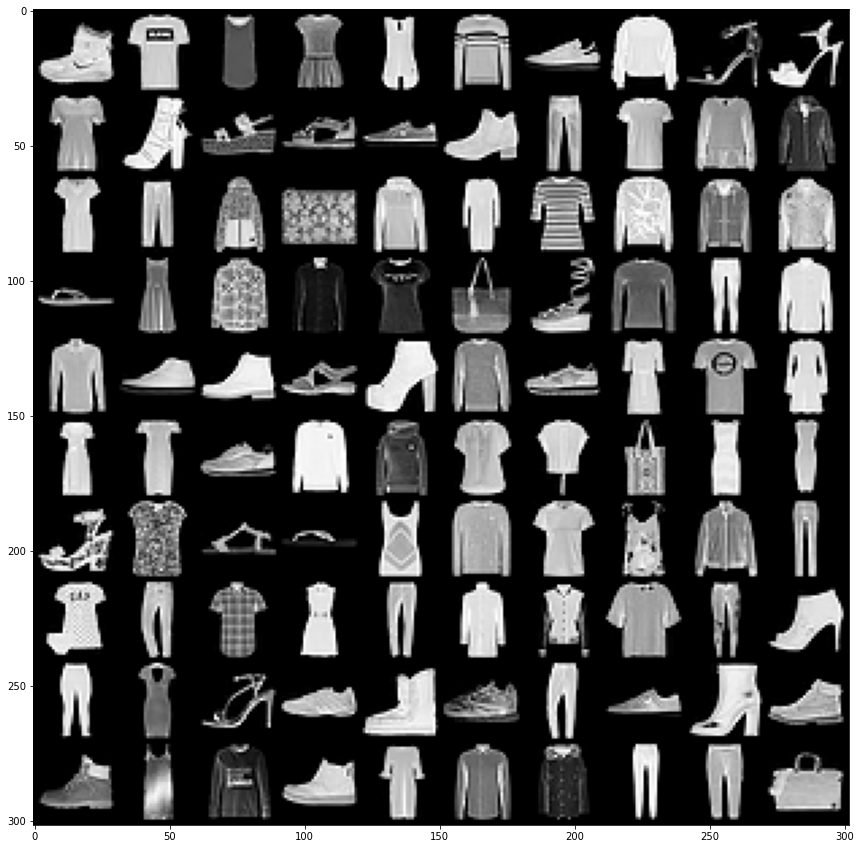

In [0]:
#time to display some data
batch=next(iter(loaded_data))
my_images,my_labels=batch
grid=torchvision.utils.make_grid(my_images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))


In [0]:
#now making of the network
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
    self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
    self.fc1=nn.Linear(in_features=12*4*4,out_features=120)
    self.fc2=nn.Linear(in_features=120,out_features=60)
    self.out=nn.Linear(in_features=60,out_features=10)

  def forward(self,t):
    #input layer
    t=t
    #conv1 layer
    t=self.conv1(t)
    t=F.relu(t)
    t=F.max_pool2d(t,kernel_size=(2,2),stride=2)
    #2nd conv2d layer
    t=self.conv2(t)
    t=F.relu(t)
    t=F.max_pool2d(t,kernel_size=(2,2),stride=2)
    #now linear layer implementation
    #first flatten the conv layer output 
    t=t.reshape(-1,12*4*4)
    t=self.fc1(t)
    t=F.relu(t)
    #next linear
    t=self.fc2(t)
    t=F.relu(t)
    #final layer
    t=self.out(t)
    
    return t


In [0]:
my_network=Network()
pair=next(iter(train_set))
image,single_label=pair
print(image.shape)
my_prediction=my_network(torch.unsqueeze(image,dim=1))
print(my_prediction)

converted=F.softmax(my_prediction,dim=1)
print('Softmax output is  ' + str(converted))
print(converted.sum(dim=1))

#now comparing with whole batch of 10, 10 images per batch
predic=my_network(my_images)
print(predic.shape)
converted_with_max=(F.softmax(predic,dim=1)).argmax(dim=1)
print(converted_with_max)
print(my_labels)
#comparision=converted_with_max.eq(my_labels)
def correctly_predicted(predics,labels):
  return predics.argmax(dim=1).eq(labels).sum().item()
comparision=correctly_predicted(predic,my_labels)
print(comparision)

torch.Size([1, 28, 28])
tensor([[-0.1376, -0.0977, -0.0987, -0.1418, -0.1200, -0.0479,  0.1273, -0.0776, -0.0396,  0.0925]],
       grad_fn=<AddmmBackward>)
Softmax output is  tensor([[0.0916, 0.0954, 0.0953, 0.0912, 0.0933, 0.1002, 0.1194, 0.0973, 0.1011, 0.1153]], grad_fn=<SoftmaxBackward>)
tensor([1.], grad_fn=<SumBackward1>)
torch.Size([100, 10])
tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])
tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8

In [0]:
my_network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

 SINGLE TRAINING FOR A SINGLE *BATCH* 

In [0]:
my_images.shape
pred=my_network(my_images)
#cross_entropy automatically does the softmax and argmax to get single vector of predicted outputs
#One time-only , it basically gets the initial wieghts from network and optimizer type as well as the magnitude of learning rate
optimizer=optim.Adam(my_network.parameters(),lr=0.01)
loss=F.cross_entropy(pred,my_labels)
loss.backward()
#actually run the update rule (above statment)
optimizer.step()

In [0]:
loss

tensor(2.2870, grad_fn=<NllLossBackward>)

##  WHOLE TRAINING LOOP NOW TO BE IMPLEMENTED

In [0]:
optimizer=optim.Adam(my_network.parameters(),lr=0.01)

for epoch in range(20):
    total_loss=0
    total_correct=0    

    for batch in loaded_data:
      images,labels=batch
      pred=my_network(images)

      #calculate loss
      loss=F.cross_entropy(pred,labels)
      #zero_out previous gradients
      optimizer.zero_grad()
      #calculate new gradients
      loss.backward()
      #perfrom a single gradient decent step
      optimizer.step()

      #keeping track of loss and accurate results
      total_loss +=loss.item()
      total_correct +=correctly_predicted(pred,labels)

    print( 'Epoch No  ' ,epoch , '  Total Correct = ',total_correct, ' total loss ', total_loss  )


Epoch No   0   Total Correct =  45129  total loss  393.3779746592045
Epoch No   1   Total Correct =  50831  total loss  248.79072418808937
Epoch No   2   Total Correct =  51557  total loss  226.31710597872734
Epoch No   3   Total Correct =  52067  total loss  215.25922547280788
Epoch No   4   Total Correct =  52188  total loss  209.42020374536514
Epoch No   5   Total Correct =  52484  total loss  203.19597281515598
Epoch No   6   Total Correct =  52527  total loss  202.35087797045708
Epoch No   7   Total Correct =  52573  total loss  200.51971265673637
Epoch No   8   Total Correct =  52781  total loss  195.72422641515732
Epoch No   9   Total Correct =  52893  total loss  193.05776435136795
Epoch No   10   Total Correct =  52836  total loss  193.81370057165623
Epoch No   11   Total Correct =  52953  total loss  191.78186689317226
Epoch No   12   Total Correct =  52992  total loss  189.57580015808344
Epoch No   13   Total Correct =  52999  total loss  190.95392862707376
Epoch No   14   T

In [0]:
53358/60000

0.8893

In [0]:
# NOW PLOTTING THE CONFUSION MATRIX
def get_all_predictions(loaded_data,my_network):
  final_stacked_result=torch.tensor([])
  for batch in (loaded_data):
    images,_=batch
    predictions=my_network(images)
    final_stacked_result=torch.cat((final_stacked_result,predictions),dim=0)
  return final_stacked_result

#calling the function 
my_predictions=get_all_predictions(loaded_data,my_network)


In [0]:
my_predictions.shape

torch.Size([60000, 10])

In [0]:
from sklearn.metrics import confusion_matrix
#from resources.plotcm import plot_confusion_matrix

my_matrix=confusion_matrix(train_set.targets,my_predictions.argmax(dim=1))

In [0]:
my_matrix

array([[5438,    7,  109,   89,    6,    2,  291,    1,   57,    0],
       [   2, 5843,    5,  141,    0,    2,    4,    0,    3,    0],
       [  57,    2, 4804,   64,  570,    1,  479,    0,   23,    0],
       [ 240,   21,   22, 5483,   85,    0,  136,    0,   12,    1],
       [   9,    2,  313,  241, 4842,    0,  571,    0,   22,    0],
       [   0,    0,    0,    1,    0, 5756,    4,  152,   13,   74],
       [1199,    1,  413,  139,  248,    0, 3927,    0,   73,    0],
       [   0,    0,    0,    0,    0,   35,    0, 5662,    2,  301],
       [  10,    2,   11,   12,   13,    3,   49,    4, 5894,    2],
       [   0,    0,    0,    0,    0,   19,    2,  123,    6, 5850]])